In [4]:
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp


In [5]:
yp_df = pd.read_excel("../../data/moving_population/ingu_hour_yeungdeungpo.xlsx",sheet_name=0)

In [6]:
yp_df.describe()

,date,hour,longitude,latitude,gu_code,dong_code,under10_ingu,under20_ingu,under30_ingu,under40_ingu,...,upper80_male_ingu,under10_female_ingu,under20_female_ingu,under30_female_ingu,under40_female_ingu,under50_female_ingu,under60_female_ingu,under70_female_ingu,under80_female_ingu,upper80_female_ingu
count,211426.0,211426.000000,211426.000000,211426.000000,211426.0,2.114260e+05,211426.000000,211426.000000,211426.000000,211426.000000,...,211426.000000,211426.000000,211426.000000,211426.000000,211426.000000,211426.000000,211426.000000,211426.000000,211426.000000,211426.000000
mean,20190911.0,11.511933,126.908673,37.520760,11560.0,1.156059e+09,0.228387,1.253968,3.204543,4.775726,...,0.181288,0.131913,0.604070,1.727053,2.209978,2.103090,1.832086,1.414956,0.695179,0.204815
std,0.0,6.919037,0.015823,0.014318,0.0,6.024133e+03,0.339337,1.819190,5.565384,8.187178,...,0.254748,0.202012,0.903035,3.148774,3.714099,3.088622,2.483981,1.825269,0.929653,0.276714
min,20190911.0,0.000000,126.878273,37.485439,11560.0,1.156052e+09,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20190911.0,6.000000,126.896687,37.511520,11560.0,1.156054e+09,0.009036,0.079011,0.302090,0.485646,...,0.009166,0.002638,0.035644,0.147897,0.208485,0.188384,0.160412,0.113010,0.045846,0.011342
50%,20190911.0,12.000000,126.906707,37.521555,11560.0,1.156056e+09,0.115537,0.661187,1.604891,2.448828,...,0.106722,0.062470,0.310205,0.820556,1.144200,1.209982,1.137155,0.909676,0.443922,0.123530
75%,20190911.0,18.000000,126.919405,37.530913,11560.0,1.156062e+09,0.309218,1.687028,3.740847,5.649971,...,0.251459,0.178894,0.803419,1.960525,2.652754,2.689145,2.484599,1.966359,0.975287,0.285818
max,20190911.0,23.000000,126.949853,37.555643,11560.0,1.156072e+09,5.971869,30.339455,138.267928,222.507677,...,6.825863,3.836334,18.295030,82.540771,90.543966,60.862535,47.005390,57.673513,51.395132,7.455296


In [8]:
yp_df.head()

,date,hour,longitude,latitude,gu_code,gu_name,dong_code,dong_name,under10_ingu,under20_ingu,...,upper80_male_ingu,under10_female_ingu,under20_female_ingu,under30_female_ingu,under40_female_ingu,under50_female_ingu,under60_female_ingu,under70_female_ingu,under80_female_ingu,upper80_female_ingu
0,20190911,0,126.904651,37.510243,11560,영등포구,1156051500,영등포본동,0.477690,2.295678,...,0.291999,0.291928,0.916024,1.710428,2.440412,3.262780,2.892460,2.045463,1.043423,0.272596
1,20190911,0,126.917051,37.516164,11560,영등포구,1156051500,영등포본동,0.261749,2.162063,...,0.387504,0.149363,0.938860,3.624611,3.544734,2.772231,2.820026,2.407307,1.139865,0.194348
2,20190911,0,126.911425,37.512080,11560,영등포구,1156051500,영등포본동,0.003061,0.223033,...,0.103522,0.003061,0.133585,0.390273,0.417927,0.513422,0.516027,0.547065,0.373192,0.124435
3,20190911,0,126.901812,37.511581,11560,영등포구,1156051500,영등포본동,0.683299,4.209149,...,0.359653,0.265973,1.946447,3.184111,5.404459,4.894257,5.373596,2.858021,1.359324,0.362667
4,20190911,0,126.913667,37.514795,11560,영등포구,1156051500,영등포본동,0.218001,1.505187,...,0.189097,0.141304,0.692433,0.846153,1.329714,1.272188,1.615956,1.570745,0.773648,0.163622


In [9]:
ingu_var = [x for x in yp_df.columns if '_ingu' in x]
print(len(ingu_var))

27


In [10]:
yp_df_2 = pd.melt(yp_df,['hour','gu_name','dong_name'],value_vars=ingu_var,var_name='성별연령대',value_name='인구')
yp_df_2.head()

,hour,gu_name,dong_name,성별연령대,인구
0,0,영등포구,영등포본동,under10_ingu,0.477690
1,0,영등포구,영등포본동,under10_ingu,0.261749
2,0,영등포구,영등포본동,under10_ingu,0.003061
3,0,영등포구,영등포본동,under10_ingu,0.683299
4,0,영등포구,영등포본동,under10_ingu,0.218001


In [11]:
yp_df_2['연령대'] = yp_df_2['성별연령대'].str.slice(stop=7)
yp_df_2['성별'] = yp_df_2['성별연령대'].str.slice(start=8)
yp_df_2.head()

,hour,gu_name,dong_name,성별연령대,인구,연령대,성별
0,0,영등포구,영등포본동,under10_ingu,0.477690,under10,ingu
1,0,영등포구,영등포본동,under10_ingu,0.261749,under10,ingu
2,0,영등포구,영등포본동,under10_ingu,0.003061,under10,ingu
3,0,영등포구,영등포본동,under10_ingu,0.683299,under10,ingu
4,0,영등포구,영등포본동,under10_ingu,0.218001,under10,ingu


In [12]:
yp_df_2_temp = yp_df_2[yp_df_2['성별']=='ingu'].groupby('연령대').sum()
yp_df_2_temp['남성'] = yp_df_2[yp_df_2['성별']=='male_ingu'].groupby('연령대').sum()['인구']
yp_df_2_temp['여성'] = yp_df_2[yp_df_2['성별']=='female_ingu'].groupby('연령대').sum()['인구']

In [13]:
yp_df_2_temp['남녀합'] = yp_df_2_temp.apply(lambda row:row['남성']+row['여성'],axis=1)
yp_df_2_temp.loc[:,['남성','여성','남녀합','인구']]

,남성,여성,남녀합,인구
연령대,,,,
under10,20384.971544,27889.897443,4.827487e+04,4.828687e+04
under20,137405.348440,127716.003376,2.651214e+05,2.651214e+05
under30,312379.936118,365143.832466,6.775238e+05,6.775238e+05
under40,542465.863670,467246.760592,1.009713e+06,1.009713e+06
under50,537428.996356,444647.905946,9.820769e+05,9.820769e+05
under60,442098.908654,387350.664030,8.294496e+05,8.294496e+05
under70,313408.928184,299158.394947,6.125673e+05,6.125673e+05
under80,152081.866403,146978.925433,2.990608e+05,2.990608e+05
upper80,38328.927985,43303.173608,8.163210e+04,6.520807e+05


In [14]:
yp_df_2_temp.rename(columns={'남성': 'male', '여성': 'female','남녀합':'sum','인구':'ingu'}, inplace=True)

In [15]:
yp_df_2['연령대'].unique()

array(['under10', 'under20', 'under30', 'under40', 'under50', 'under60',
       'under70', 'under80', 'upper80'], dtype=object)

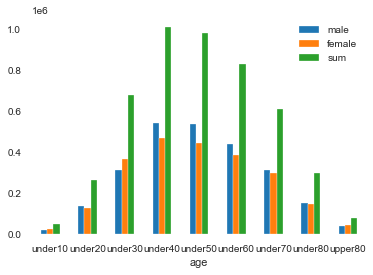

In [100]:
analysis_age = yp_df_2_temp.loc[:,['male','female','sum']]
analysis_age['age'] = yp_df_2['연령대'].unique()
ax = analysis_age.plot.bar(x='age', rot=0)
plt.savefig('analysis_age_yp.png')

In [104]:
analysis_age

,male,female,sum,age
연령대,,,,
under10,20384.971544,27889.897443,4.827487e+04,under10
under20,137405.348440,127716.003376,2.651214e+05,under20
under30,312379.936118,365143.832466,6.775238e+05,under30
under40,542465.863670,467246.760592,1.009713e+06,under40
under50,537428.996356,444647.905946,9.820769e+05,under50
under60,442098.908654,387350.664030,8.294496e+05,under60
under70,313408.928184,299158.394947,6.125673e+05,under70
under80,152081.866403,146978.925433,2.990608e+05,under80
upper80,38328.927985,43303.173608,8.163210e+04,upper80


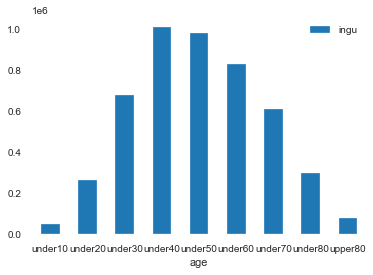

In [110]:
analysis_age.rename(columns={'sum':'ingu'},inplace=True)
ax3 = analysis_age.loc[:,['age','ingu']].plot.bar(x='age',y='ingu',rot=0)
plt.savefig('analysis_age_yp_total.png')

In [111]:
## TODO : 각 연령대 별 시간 표시

## 유동인구가 많은 시간대 파악

In [16]:
yp_df_unisex = yp_df_2[yp_df_2['성별']=='ingu']
yp_df_2 = yp_df_2[yp_df_2['성별']!='ingu']

In [17]:
analysis_time = yp_df_2[yp_df_2['성별']=='male_ingu'].groupby('hour').sum()
analysis_time.rename(columns={'인구':'male'},inplace=True)

analysis_time['female'] = yp_df_2[yp_df_2['성별']=='female_ingu'].groupby('hour').sum()
analysis_time['sum'] = analysis_time.apply(lambda row:row['male']+row['female'],axis=1)
analysis_time

,male,female,sum
hour,,,
0,87645.950411,83666.367734,171312.318146
1,86411.336857,83026.111306,169437.448163
2,85335.966923,82538.623881,167874.590804
3,84328.493369,82029.960605,166358.453975
4,84176.010494,82453.976289,166629.986783
5,85708.062638,82992.007766,168700.070404
6,90665.613583,84714.630578,175380.244161
7,107679.423747,95338.712522,203018.136269
8,119892.442228,106192.185663,226084.627891


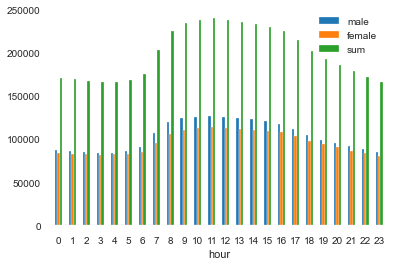

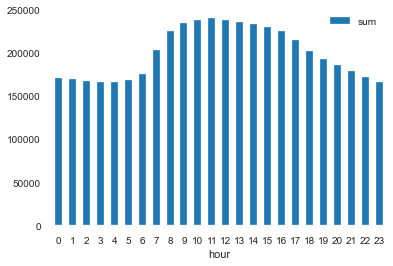

In [98]:
ax = analysis_time.plot.bar( rot=0)
plt.savefig('analysis_time_yp.png')
ax2 = analysis_time.loc[:,['sum']].plot.bar( rot=0)
plt.savefig('analysis_time_yp_total.png')

### 시간대별 연령대 누적 그래프 그리기

In [18]:
male_ingu_var =[x for x in ingu_var if 'male' in x]
female_ingu_var =[x for x in ingu_var if 'female' in x]
print(male_ingu_var)
print(female_ingu_var)

['under10_male_ingu', 'under20_male_ingu', 'under30_male_ingu', 'under40_male_ingu', 'under50_male_ingu', 'under60_male_ingu', 'under70_male_ingu', 'under80_male_ingu', 'upper80_male_ingu', 'under10_female_ingu', 'under20_female_ingu', 'under30_female_ingu', 'under40_female_ingu', 'under50_female_ingu', 'under60_female_ingu', 'under70_female_ingu', 'under80_female_ingu', 'upper80_female_ingu']
['under10_female_ingu', 'under20_female_ingu', 'under30_female_ingu', 'under40_female_ingu', 'under50_female_ingu', 'under60_female_ingu', 'under70_female_ingu', 'under80_female_ingu', 'upper80_female_ingu']


In [19]:
new_ingu_var = [x.split('_')[0] for x in ingu_var if len(x)<13]
yp_df_3 = yp_df.loc[:,['hour','gu_name','dong_name']]
for idx,_var in enumerate(new_ingu_var):
    yp_df_3[_var] = yp_df.apply(lambda row:row[male_ingu_var[idx]]+row[female_ingu_var[idx]],axis=1)


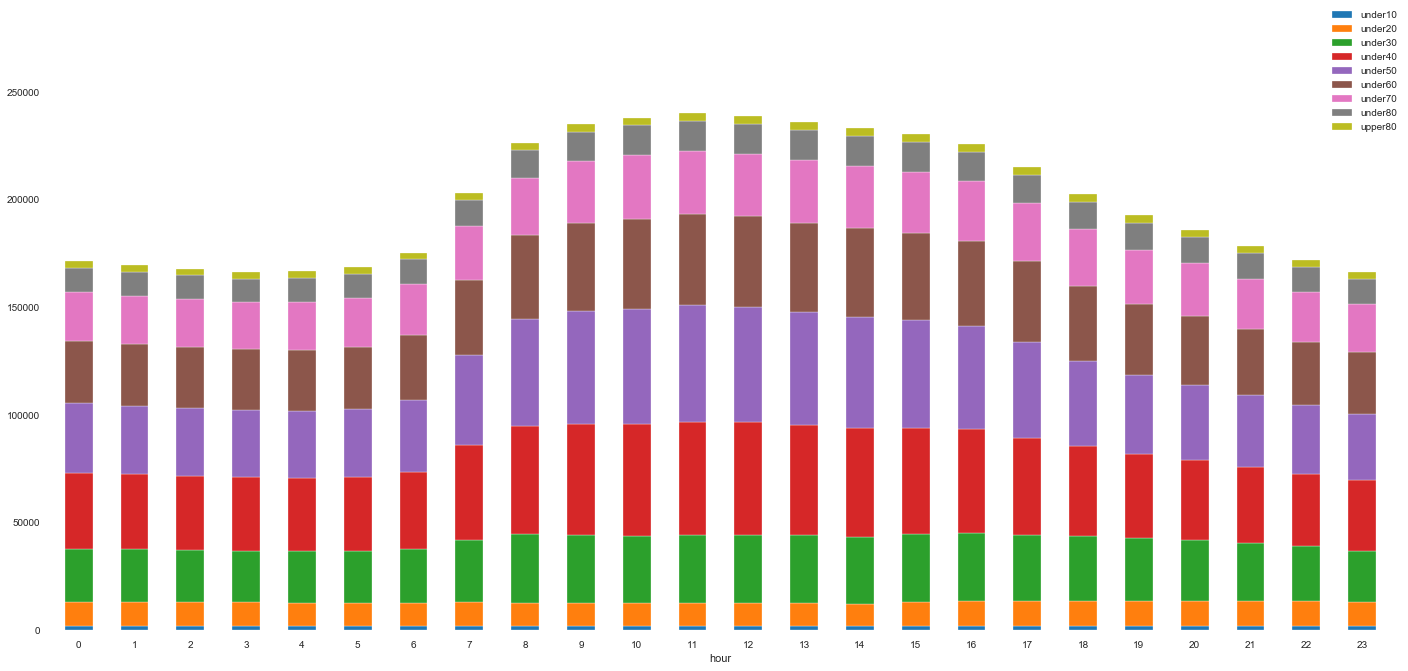

In [24]:
analysis_time_stack = yp_df_3.groupby('hour').sum()
analysis_time_stack2 = analysis_time_stack.copy()
analysis_time_stack2['hour'] = yp_df_3['hour'].unique()
ax4 = analysis_time_stack2.plot.bar(x='hour',rot=0,stacked=True,figsize=(24, 10))
ax4.legend(bbox_to_anchor=(0.95, 0.9)) 
# plt.savefig('analysis_time_mp_total_wrt_age2.png')

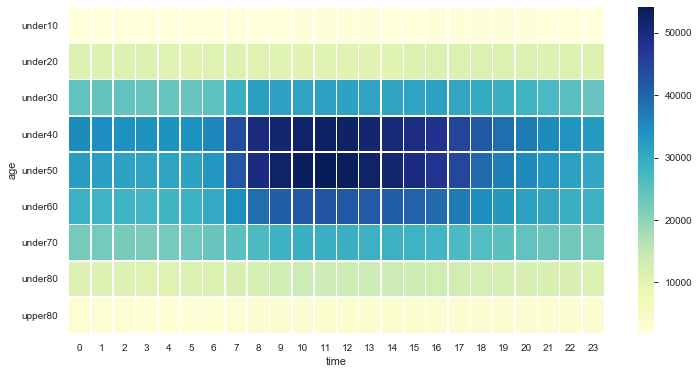

In [25]:
analysis_time_stack_heatmap = analysis_time_stack.transpose()
analysis_time_stack_heatmap
plt.figure(figsize=(12, 6))
snsplt = sns.heatmap(analysis_time_stack_heatmap,cmap="YlGnBu", linewidths=.5)
snsplt.set_xlabel("time")
snsplt.set_ylabel("age")
sns_fig = snsplt.get_figure()

sns_fig.savefig('time_age_population_yp.png')

In [26]:
analysis_time_stack_heatmap

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
under10,2025.535833,1997.618960,1960.191982,1926.338305,1885.642965,1864.800978,1851.513422,1867.443396,1993.518997,2049.353524,...,1973.952828,2043.187749,2090.111104,2071.498530,2123.597696,2095.433017,2115.829593,2053.916972,2003.369315,1963.067553
under20,11227.346793,11176.324405,11152.009386,11077.370610,10927.554158,10826.581136,10985.071443,11100.845159,10909.279505,10701.934975,...,10263.601895,11161.189914,11467.880536,11454.215988,11503.617765,11480.925607,11526.744351,11370.962099,11500.582958,11118.842466
under30,24598.530804,24391.534315,24136.735710,23929.286926,23912.862432,24067.969198,24808.062431,29040.594648,31918.279886,31622.928406,...,31176.347188,31367.641330,31715.793954,30846.490212,30138.263916,29280.695645,28274.375257,27145.422345,25414.209559,23926.989282
under40,35296.808777,34898.734593,34496.777934,34289.909352,34156.360029,34367.110132,35676.025422,43849.349269,49871.921932,51408.611008,...,50496.337748,49568.427528,48209.765490,45044.410545,41822.296037,38831.779525,36990.405317,35301.778385,33804.897327,32733.323606
under50,32421.266430,31901.468364,31467.701637,31227.906666,31130.222781,31572.677070,33468.106213,42187.963793,49790.120973,52400.595123,...,51474.753573,49760.485740,47850.043300,44622.092318,39603.202118,36752.537283,35140.073683,33363.322973,31792.267400,30709.234284
under60,28844.866355,28483.496845,28266.074889,27926.224544,28114.469747,28630.855824,30240.130116,34575.514025,38888.172165,41030.895898,...,41215.445049,40478.769310,39354.253587,37433.819753,34829.892742,33133.660119,31808.952870,30522.397020,29407.294277,28622.494914
under70,22439.117419,22287.836796,22176.054994,21943.335565,22454.111168,22995.923528,23761.435626,25292.838562,26853.620352,28734.242516,...,28959.342495,28466.160451,27784.054407,26937.354886,26081.327888,25221.355547,24529.847295,23490.596076,22945.621993,22461.085502
under80,11296.825262,11172.176956,11111.522911,10990.225075,11031.869369,11329.872454,11532.491624,11920.451990,12550.743249,13472.199864,...,13922.335986,13686.220318,13480.949116,13202.430479,12850.394246,12504.527415,12165.153837,11920.403764,11734.353881,11548.364107
upper80,3162.020473,3128.256929,3107.521362,3047.856931,3016.894134,3044.280085,3057.407865,3183.135427,3308.970831,3587.710893,...,3734.639377,3746.600135,3663.254073,3571.520196,3539.060410,3496.756383,3414.912355,3375.481016,3343.428438,3280.737301


### 유출입 인구수 파악을 위해 거주지 인구수와의 차이를 가시화

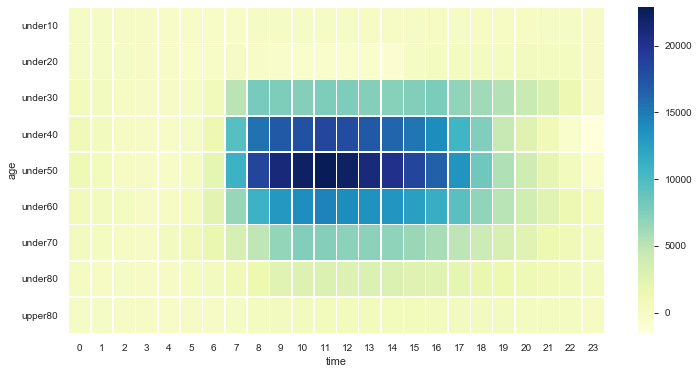

In [27]:
analysis_time_heatmap_wrt3 = analysis_time_stack_heatmap.copy()
for idx in range(24):
    analysis_time_heatmap_wrt3[idx] = analysis_time_stack_heatmap[idx]-analysis_time_stack_heatmap[3]
analysis_time_heatmap_wrt3.describe()
vmin = analysis_time_heatmap_wrt3.min().min()
# analysis_time_heatmap_wrt3
plt.figure(figsize=(12, 6))
snsplt = sns.heatmap(analysis_time_heatmap_wrt3,cmap="YlGnBu", linewidths=.5,vmin=vmin)
snsplt.set_xlabel("time")
snsplt.set_ylabel("age")
sns_fig = snsplt.get_figure()

sns_fig.savefig('time_age_population_yp_wrt3.png')